O código deste notebook é baseado em: https://www.datacamp.com/projects/38

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk

Funções auxiliares

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def getTextInHtml(url):
  """
    receive a url website
    return the text of website
  """

  r = requests.get(url)
  r.encoding = "utf-8"
  html = r.text
  soup = BeautifulSoup(html, 'html.parser')
  return ''.join([tag.string for tag in soup.find_all() if tag.name != 'pre' and tag.string != None])

def preprocessing(text,sw=True):
  """
    receive a text and options for removing stopwords (default is True)
    return the text preprocessed 
  """

  tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
  tokens = tokenizer.tokenize(text)
  words = [word.lower() for word in tokens]
  if (sw):
    stop_words = stopwords.words('english')    
    words = [word for word in words if word not in stop_words]    

  return words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Livros escolhidos:


*   Alice in Wonderland 
*   Don Quixote
*   The Adventures of Sherlock Holmes




Obtendo livro via html

In [ ]:
alice = "https://www.gutenberg.org/files/28885/28885-h/28885-h.htm"
donquixote = "https://www.gutenberg.org/files/996/996-h/996-h.htm"
sherlock = "https://www.gutenberg.org/files/1661/1661-h/1661-h.htm"

text_alice = getTextInHtml(alice)
text_donquixote = getTextInHtml(donquixote)
text_sherlock = getTextInHtml(sherlock)

Aplicando o texto da url na função de pré-processamento
* aplicando lower case
* removendo stopwords 

In [ ]:
data_alice = preprocessing(text_alice)
data_donquixote = preprocessing(text_donquixote)
data_sherlock = preprocessing(text_sherlock)

Usando o FreqDist para obter a frequência das palavras no livro

In [ ]:
freqdist_alice = nltk.FreqDist(data_alice)
freqdist_donquixote = nltk.FreqDist(data_donquixote)
freqdist_sherlock = nltk.FreqDist(data_sherlock)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

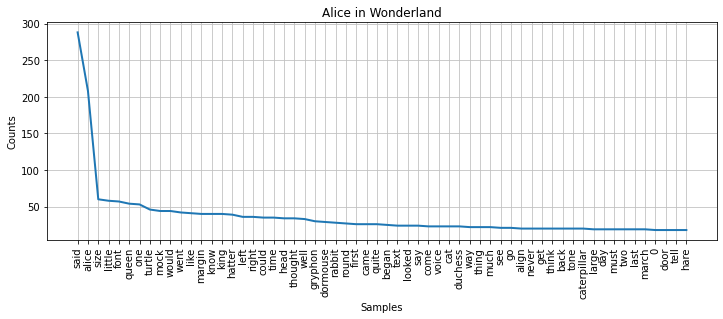

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_alice.plot(60,title="Alice in Wonderland")

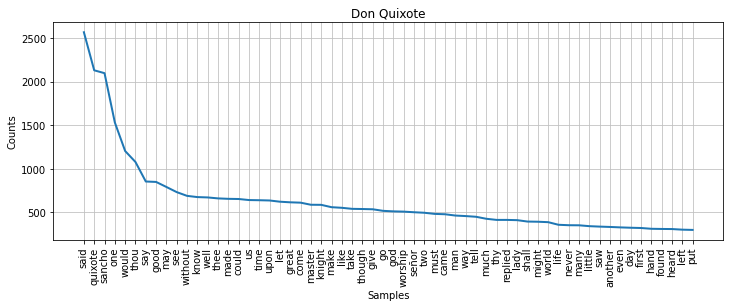

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_donquixote.plot(60,title="Don Quixote")

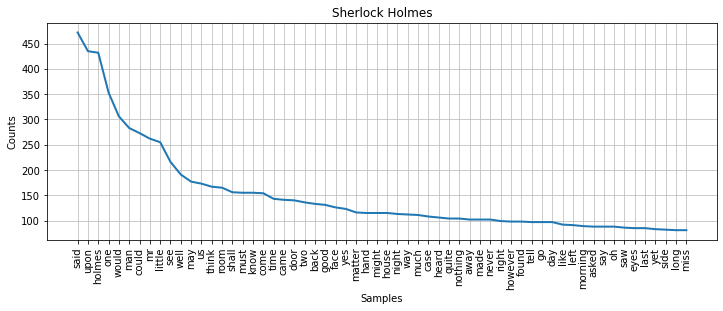

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_sherlock.plot(60,title="Sherlock Holmes")

### Podemos observar visualmente no gráfico acima que os três livros

satisfazem a lei de zipf, onde podemos observar que a frequência de uma palavra f(n) está ligada a sua ordem/posição produzindo então o efeito de cauda longa, onde temos poucas palavras que ocorrem muitas vezes e muitas palavras que ocorrem poucas vezes.

Alice, Quixote e Holmes foram palavras observadas nos respectivos gráficos de frequência de palavra nos livros, que são referente ao protagonista do livre e sendo assim são palavras que ocorreram muitas vezes.


### Análise em Bigramas

##### Obtendo as bigramas de cada livro


In [ ]:
from nltk import bigrams

bigrams_alice = [grams[0] + ' ' + grams[1] for grams in bigrams(data_alice)]
bigrams_donquixote = [grams[0] + ' ' + grams[1] for grams in bigrams(data_donquixote)]
bigrams_sherlock = [grams[0] + ' ' + grams[1] for grams in bigrams(data_sherlock)]

#### Calculando a frequência de cada bigrama

In [ ]:
freqdist_alice_bigram = nltk.FreqDist(bigrams_alice)
freqdist_donquixote_bigram = nltk.FreqDist(bigrams_donquixote)
freqdist_sherlock_bigram = nltk.FreqDist(bigrams_sherlock)

#### Plotando gráfico + análise da lei de zipf

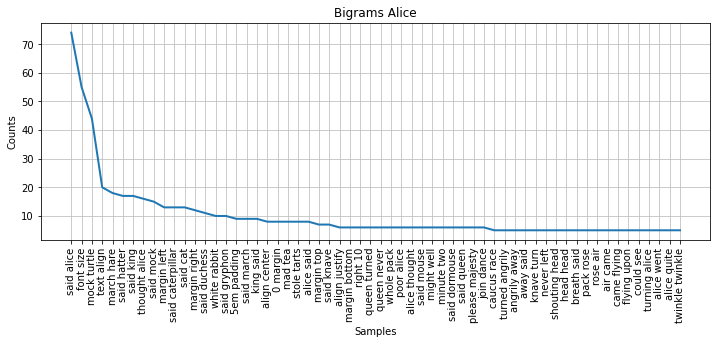

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_alice_bigram.plot(60,title="Bigrams Alice")

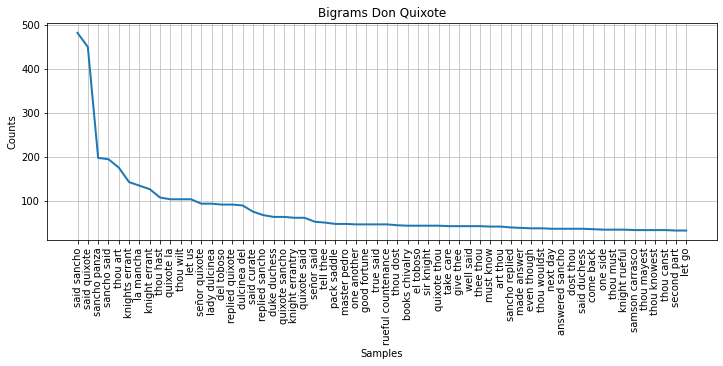

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_donquixote_bigram.plot(60,title="Bigrams Don Quixote")

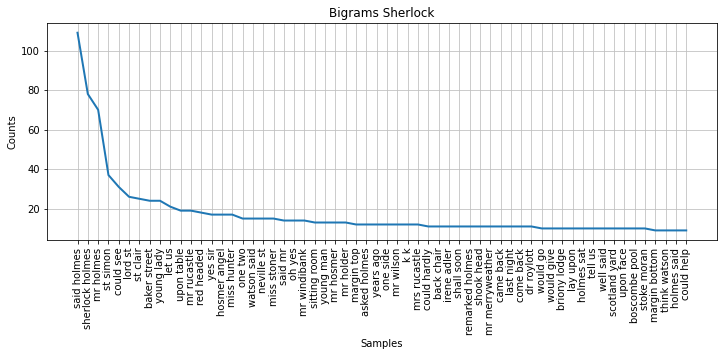

In [ ]:
plt.figure(figsize=(12, 4)) 
freqdist_sherlock_bigram.plot(60,title="Bigrams Sherlock")

Podemos observar que nas bigramas também temos a ocorrência da lei de zipf, onde agora estamos levando em consideração pares de palavra. <br>
Bigramas bastante utilizados e que referenciam os protagonistas dos livros: <br>

*   Bigram: *said alice* - Alice in Wonderland 
*   Bigram: *said sancho* - Don Quixote 
*   Bigram: *said holmes* - Sherlock Holmes  
